impor modul NumPy

In [1]:
import numpy as np

Class Regresi Linier

In [4]:
# Kelas MyLinearRegression yang sangat sederhana
class RegresiLinier:

    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept

In [5]:
# Buat instansi dan periksa atribut
rl = RegresiLinier()

In [6]:
rl._fit_intercept

True

In [7]:
rl.coef_==None

True

In [8]:
rl.intercept_ == None

True

In [10]:
print(rl)

Metode deskripsi bawaan

kita dapat menambahkan metode khusus bawaan __repr__ untuk membuat string deskripsi singkat

In [11]:
class RegresiLinier:

    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept

    def __repr__(self):
        return "Saya adalah model Regresi Linier!"

In [12]:
rl = RegresiLinier()

In [13]:
print(rl)

Saya adalah model Regresi Linier!


Menambahkan metode fit

Sekarang, kita dapat menambahkan metode inti yang disebut fit. Ini menggunakan rutinitas aljabar linear dari NumPy untuk menyelesaikan masalah regresi linear (univariat atau multivariat).

In [39]:
class  RegresiLinier:

    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept

    def __repr__(self):
        return "Saya adalah model Regresi Linier!"

    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array
        y: 1D numpy array
        """

        # Mengecek apakah X adalah array 1D atau 2D
        if len(X.shape) == 1:
            X = X.reshape(-1,1)

        # Menambahkan bias jika fit_intercept bernilai True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X

        # Solusi bentuk tertutup (closed form)
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)

        # Mengatur atribut-atribut
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef

Menghasilkan beberapa data acak untuk pengujian

In [15]:
X = 10*np.random.random(size=(20,2))
y = 3.5*X.T[0]-1.2*X.T[1]+2*np.random.randn(20)

In [16]:
import matplotlib.pyplot as plt

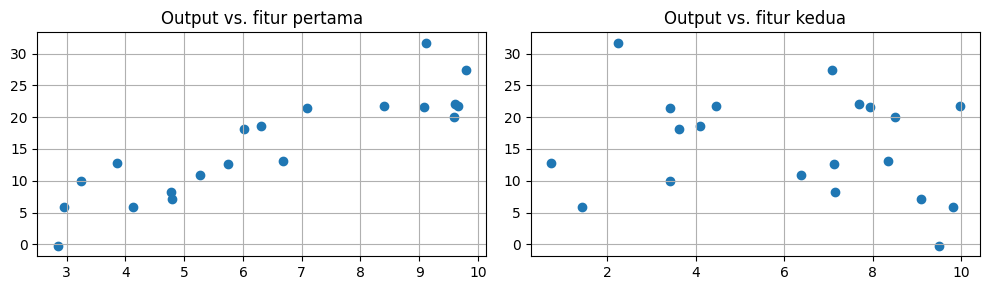

In [17]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

ax[0].scatter(X.T[0],y)
ax[0].set_title("Output vs. fitur pertama")
ax[0].grid(True)
ax[1].scatter(X.T[1],y)
ax[1].set_title("Output vs. fitur kedua")
ax[1].grid(True)
fig.tight_layout()
plt.show()

Membuat objek MyLinearRegression baru dan menyesuaikan data

In [18]:
rl = RegresiLinier()

In [19]:
print("Data belum kami sesuaikan. Tidak ada koefisien regresi")
print("Koefisien Regresi:", rl.coef_)

Data belum kami sesuaikan. Tidak ada koefisien regresi
Koefisien Regresi: None


In [20]:
rl.fit(X,y)

In [21]:
print("Data belum kami sesuaikan. Tidak ada koefisien regresi")
print("Koefisien Regresi:", rl.coef_)

Data belum kami sesuaikan. Tidak ada koefisien regresi
Koefisien Regresi: [ 3.24727298 -1.15686156]


In [25]:
print("Nilai intersep diberikan oleh: ", rl.intercept_)

Nilai intersep diberikan oleh:  1.6652780210620064


Perbandingan antara nilai sebenarnya (ground truth) dan nilai yang sesuai

Tidakkah bagus untuk membandingkan nilai sebenarnya dengan prediksi dan melihat seberapa dekat mereka cocok?

In [26]:
coef_ = rl.coef_
y_pred = np.dot(X,coef_)+rl.intercept_

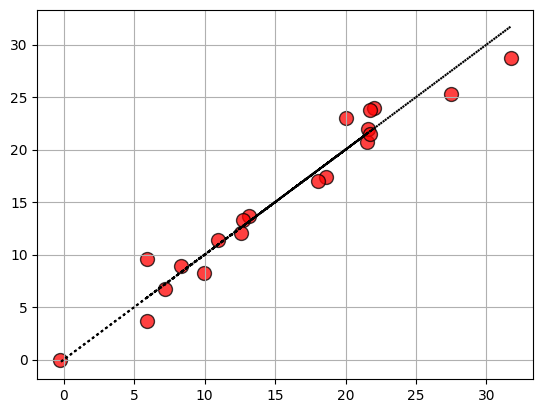

In [27]:
plt.scatter(y,y_pred,s=100,alpha=0.75,color='red',edgecolor='k')
plt.plot(y,y,c='k',linestyle='dotted')
plt.grid(True)
plt.show()

Enkapsulasi

Tapi kita tidak ingin menulis kode mandiri. Bisakah kita menggabungkan kode ke dalam kelas?

In [41]:
class  RegresiLinier:

    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept

    def __repr__(self):
        return "Saya adalah model Regresi Linier!"

    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array
        y: 1D numpy array
        """

        # Mengecek apakah X adalah array 1D atau 2D
        if len(X.shape) == 1:
            X = X.reshape(-1,1)

        # Menambahkan bias jika fit_intercept bernilai True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X

        # Solusi bentuk tertutup (closed form)
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)

        # Mengatur atribut-atribut
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef

        # Prediksi/nilai yang sesuai dengan y
        self.fitted_ = np.dot(X,rl.coef_) + rl.intercept_

    def plot_fitted(self,reference_line=False):
        """
        Plots fitted values against the true output values from the data

        Arguments:
        reference_line: A Boolean switch to draw a 45-degree reference line on the plot
        """
        plt.title("True vs. fitted values",fontsize=14)
        plt.scatter(y,self.fitted_,s=100,alpha=0.75,color='red',edgecolor='k')
        if reference_line:
            plt.plot(y,y,c='k',linestyle='dotted')
        plt.xlabel("True values")
        plt.ylabel("Fitted values")
        plt.grid(True)
        plt.show()

Demonstrasi metode plot_fitted yang baru

Sekarang kelas MyLinearRegression memiliki kemampuan (alias metode) untuk menyesuaikan data dan memvisualisasikan nilai keluaran yang sesuai / sebenarnya dalam plot

In [42]:
# Contoh baru
rl = RegresiLinier()
# Penyesuaian dengan data
rl.fit(X,y)

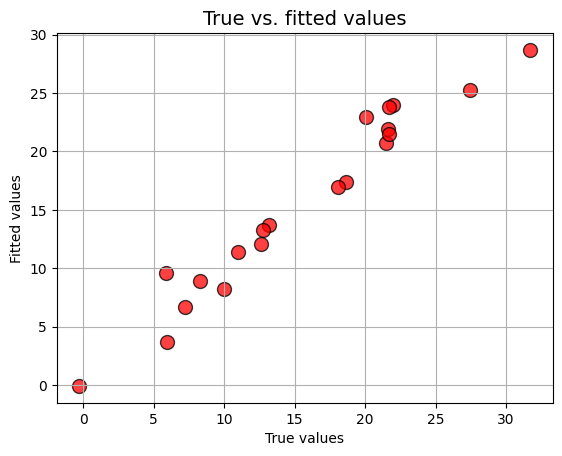

In [43]:
# Penyesuaian dengan data'
rl.plot_fitted()

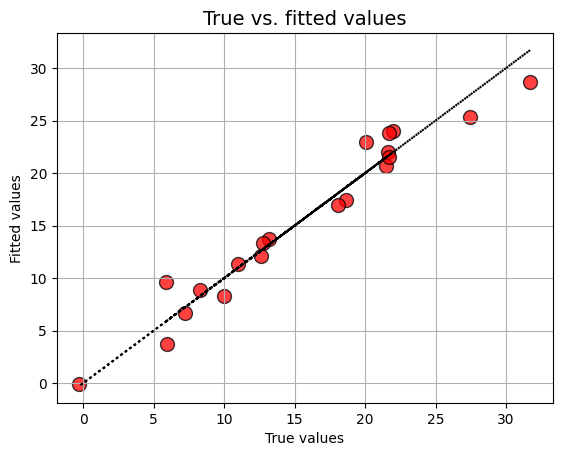

In [44]:
# Kita dapat menyertakan parameter 'reference_line' untuk menggambar garis referensi 45 derajat pada plot
rl.plot_fitted(reference_line=True)

Menambahkan metode predict

Sekarang, kita ingin memperluas fungsionalitas dan menambahkan metode predict untuk memungkinkan kelas ini memprediksi untuk setiap dataset baru yang sewenang-wenang

In [45]:
class RegresiLinier:

    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept

    def __repr__(self):
        return "Saya adalah model Regresi Linier!"

    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array
        y: 1D numpy array
        """

        # Mengecek apakah X adalah array 1D atau 2D
        if len(X.shape) == 1:
            X = X.reshape(-1,1)

        # Menambahkan bias jika fit_intercept bernilai True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X

        # Solusi bentuk tertutup (closed form)
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)

        # Mengatur atribut-atribut
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef

        # Prediksi/nilai yang sesuai dengan y
        self.fitted_ = np.dot(X,rl.coef_) + rl.intercept_

    def plot_fitted(self,reference_line=False):
        """
        Plots fitted values against the true output values from the data

        Arguments:
        reference_line: A Boolean switch to draw a 45-degree reference line on the plot
        """
        plt.title("True vs. fitted values",fontsize=14)
        plt.scatter(y,self.fitted_,s=100,alpha=0.75,color='red',edgecolor='k')
        if reference_line:
            plt.plot(y,y,c='k',linestyle='dotted')
        plt.xlabel("True values")
        plt.ylabel("Fitted values")
        plt.grid(True)
        plt.show()

    def predict(self, X):
        """Output model prediction.

        Arguments:
        X: 1D or 2D numpy array
        """
        # Mengecek apakah X adalah array 1D atau 2D
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        self.predicted_ = self.intercept_ + np.dot(X, self.coef_)
        return self.predicted_

enguji metode predict dengan data baru

Perhatikan jumlah sampel yang berbeda dari set pelatihan.

In [33]:
num_new_samples = 10
X_new = 10*np.random.random(size=(num_new_samples,2))

In [34]:
y_new = 3.5*X_new.T[0]-1.2*X_new.T[1]+2*np.random.randn(num_new_samples)

In [35]:
rl = RegresiLinier()

In [36]:
rl.fit(X,y)

In [37]:
y_pred=rl.predict(X_new)

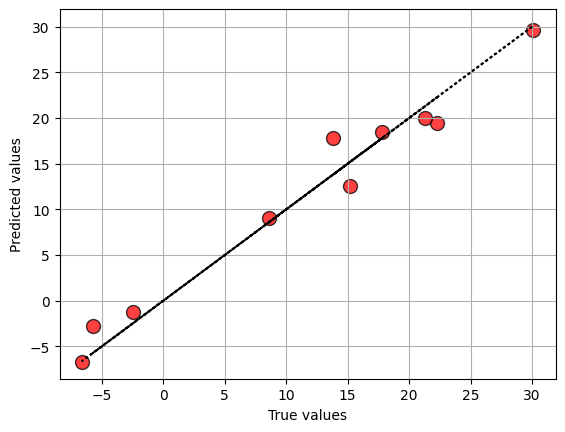

In [38]:
plt.scatter(y_new,y_pred,s=100,alpha=0.75,color='red',edgecolor='k')
plt.plot(y_new,y_new,c='k',linestyle='dotted')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.grid(True)
plt.show()